In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('../data/phones.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../data/phones.csv')
df.head()

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  \
0         203   2357    10   135.0          5.2  424         8      1.35   
1         880   1749    10   125.0          4.0  233         2      1.30   
2          40   1916    10   110.0          4.7  312         4      1.20   
3          99   1315    11   118.5          4.0  233         2      1.30   
4         880   1749    11   125.0          4.0  233         2      1.30   

   internal mem    ram  RearCam  Front_Cam  battery  thickness  
0          16.0  3.000    13.00        8.0     2610        7.4  
1           4.0  1.000     3.15        0.0     1700        9.9  
2           8.0  1.500    13.00        5.0     2000        7.6  
3           4.0  0.512     3.15        0.0     1400       11.0  
4           4.0  1.000     3.15        0.0     1700        9.9

In [4]:
print(df.dtypes)

Product_id        int64
Price             int64
Sale              int64
weight          float64
resoloution     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
dtype: object


In [5]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [6]:
df[df.duplicated()]

Empty DataFrame
Columns: [Product_id, Price, Sale, weight, resoloution, ppi, cpu core, cpu freq, internal mem, ram, RearCam, Front_Cam, battery, thickness]
Index: []

In [7]:
df.drop('Product_id', inplace = True, axis = 1)
df.drop('Sale', inplace = True, axis = 1)

In [8]:
df.describe()

Price      weight  resoloution         ppi    cpu core  \
count   161.000000  161.000000   161.000000  161.000000  161.000000   
mean   2215.596273  170.426087     5.209938  335.055901    4.857143   
std     768.187171   92.888612     1.509953  134.826659    2.444016   
min     614.000000   66.000000     1.400000  121.000000    0.000000   
25%    1734.000000  134.100000     4.800000  233.000000    4.000000   
50%    2258.000000  153.000000     5.150000  294.000000    4.000000   
75%    2744.000000  170.000000     5.500000  428.000000    8.000000   
max    4361.000000  753.000000    12.200000  806.000000    8.000000   

         cpu freq  internal mem         ram     RearCam   Front_Cam  \
count  161.000000    161.000000  161.000000  161.000000  161.000000   
mean     1.502832     24.501714    2.204994   10.378261    4.503106   
std      0.599783     28.804773    1.609831    6.181585    4.342053   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%      1.200000      8.000000    1.000000    5.000000    0.000000   
50%      1.400000     16.000000    2.000000   12.000000    5.000000   
75%      1.875000     32.000000    3.000000   16.000000    8.000000   
max      2.700000    128.000000    6.000000   23.000000   20.000000   

           battery   thickness  
count   161.000000  161.000000  
mean   2842.111801    8.921739  
std    1366.990838    2.192564  
min     800.000000    5.100000  
25%    2040.000000    7.600000  
50%    2800.000000    8.400000  
75%    3240.000000    9.800000  
max    9500.000000   18.500000

In [9]:
df.shape

(161, 12)

In [10]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['weight'], ax = ax[0], color = 'b')
sns.distplot(df['weight'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Weight before removal of outliers')
ax[1].set_title('Box Plot of before after removal of outliers')
plt.show()

In [11]:
lower_limit = df['weight'].mean() - 3*df['weight'].std()
upper_limit = df['weight'].mean() + 3*df['weight'].std()

In [12]:
df = df[df['weight'] < upper_limit ]

In [13]:
df[df['weight'] < lower_limit ]

Empty DataFrame
Columns: [Price, weight, resoloution, ppi, cpu core, cpu freq, internal mem, ram, RearCam, Front_Cam, battery, thickness]
Index: []

In [14]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['weight'], ax = ax[0], color = 'b')
sns.distplot(df['weight'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of weight after removal of outliers')
ax[1].set_title('Box Plot of weight after removal of outliers')
plt.show()

In [15]:
df.describe()

Price      weight  resoloution         ppi    cpu core  \
count   157.000000  157.000000   157.000000  157.000000  157.000000   
mean   2213.254777  158.946497     5.058599  337.592357    4.828025   
std     777.275443   55.358625     1.175743  135.574086    2.447339   
min     614.000000   66.000000     1.400000  121.000000    0.000000   
25%    1734.000000  134.000000     4.800000  233.000000    4.000000   
50%    2258.000000  152.000000     5.100000  294.000000    4.000000   
75%    2744.000000  170.000000     5.500000  432.000000    8.000000   
max    4361.000000  404.000000     8.000000  806.000000    8.000000   

         cpu freq  internal mem         ram     RearCam   Front_Cam  \
count  157.000000    157.000000  157.000000  157.000000  157.000000   
mean     1.491949     24.514497    2.197478   10.477070    4.566879   
std      0.601143     29.143473    1.627670    6.224035    4.378596   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%      1.200000      8.000000    1.000000    5.000000    0.000000   
50%      1.400000     16.000000    2.000000   12.000000    5.000000   
75%      1.875000     32.000000    3.000000   16.000000    8.000000   
max      2.700000    128.000000    6.000000   23.000000   20.000000   

           battery   thickness  
count   157.000000  157.000000  
mean   2699.235669    8.947771  
std    1030.240382    2.214248  
min     800.000000    5.100000  
25%    2040.000000    7.600000  
50%    2700.000000    8.500000  
75%    3200.000000    9.900000  
max    7000.000000   18.500000

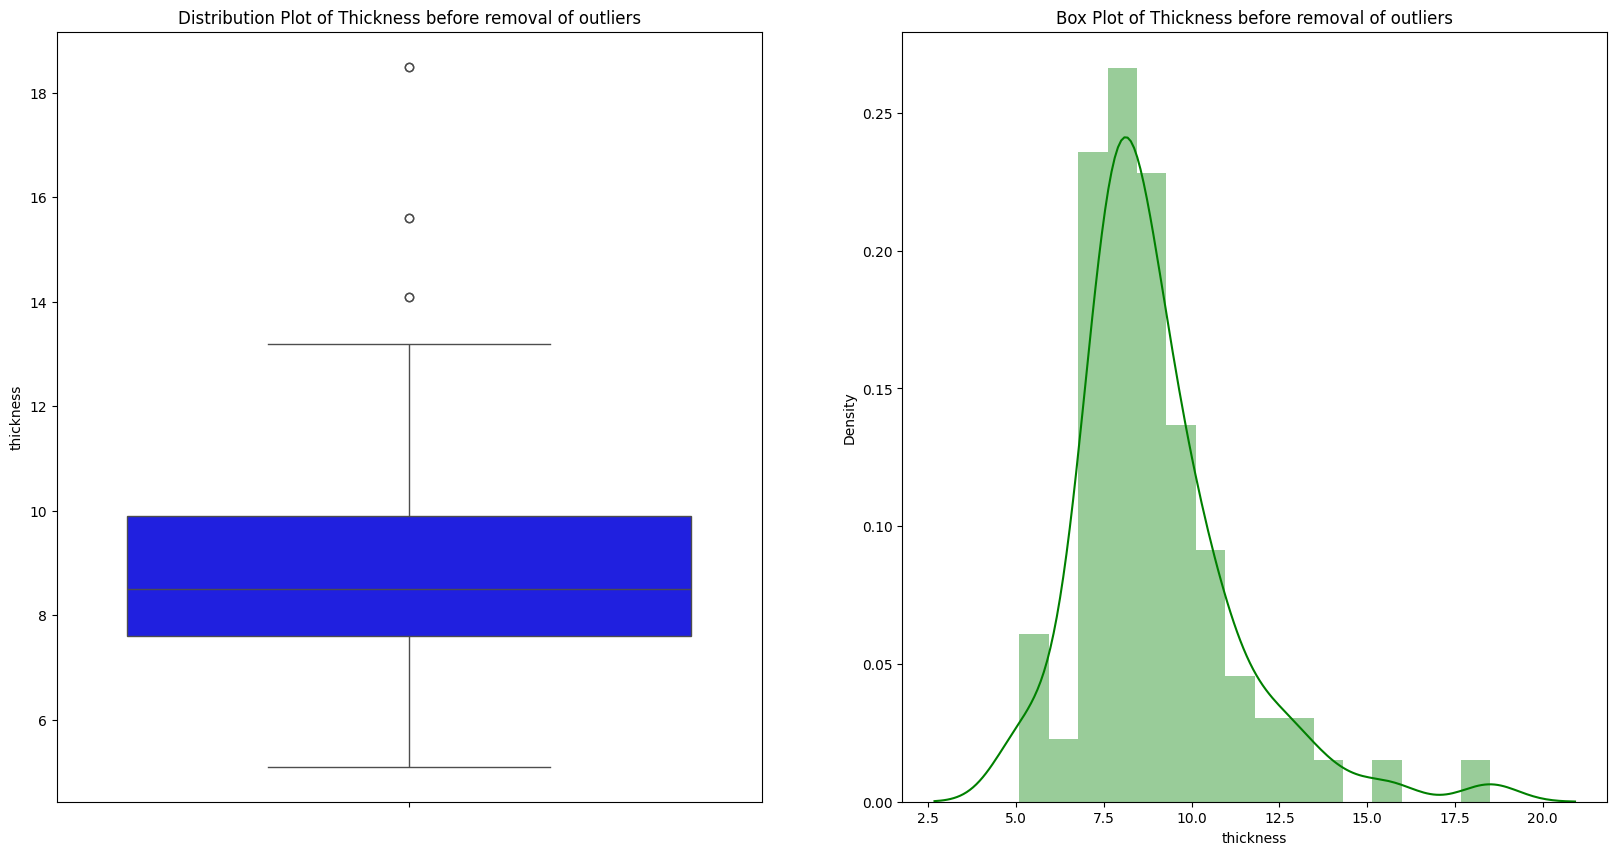

In [16]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['thickness'], ax = ax[0], color = 'b')
sns.distplot(df['thickness'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Thickness before removal of outliers')
ax[1].set_title('Box Plot of Thickness before removal of outliers')
plt.show()

In [17]:
lower_limit = df['thickness'].mean() - 3*df['thickness'].std()
upper_limit = df['thickness'].mean() + 3*df['thickness'].std()

In [18]:
df = df[df['thickness'] < upper_limit]

In [19]:
df[df['thickness'] < lower_limit]

Empty DataFrame
Columns: [Price, weight, resoloution, ppi, cpu core, cpu freq, internal mem, ram, RearCam, Front_Cam, battery, thickness]
Index: []

In [20]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['thickness'], ax = ax[0], color = 'b')
sns.distplot(df['thickness'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Thickness after removal of outliers')
ax[1].set_title('Box Plot of Thickness after removal of outliers')
plt.show()

In [21]:
df.describe()

Price      weight  resoloution         ppi    cpu core  \
count   153.00000  153.000000   153.000000  153.000000  153.000000   
mean   2253.69281  160.318954     5.133333  343.071895    4.954248   
std     745.25953   55.411851     1.094572  132.957804    2.348964   
min     614.00000   66.000000     1.400000  121.000000    0.000000   
25%    1741.00000  135.000000     5.000000  233.000000    4.000000   
50%    2266.00000  153.000000     5.150000  306.000000    4.000000   
75%    2746.00000  170.000000     5.500000  432.000000    8.000000   
max    4361.00000  404.000000     8.000000  806.000000    8.000000   

         cpu freq  internal mem         ram     RearCam   Front_Cam  \
count  153.000000    153.000000  153.000000  153.000000  153.000000   
mean     1.530954     25.150379    2.252837   10.707843    4.686275   
std      0.557472     29.252658    1.611797    6.136022    4.371891   
min      0.000000      0.000000    0.000000    0.000000    0.000000   
25%      1.200000      8.000000    1.000000    5.000000    0.900000   
50%      1.400000     16.000000    2.000000   12.000000    5.000000   
75%      1.875000     32.000000    3.000000   16.000000    8.000000   
max      2.700000    128.000000    6.000000   23.000000   20.000000   

           battery   thickness  
count   153.000000  153.000000  
mean   2745.620915    8.735948  
std    1002.150044    1.789943  
min     800.000000    5.100000  
25%    2100.000000    7.600000  
50%    2800.000000    8.400000  
75%    3200.000000    9.700000  
max    7000.000000   14.100000

In [22]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=106)

In [26]:
regressors = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','SVR','XGBRegressor']

In [27]:
def model_validation(model):
    step1 = ColumnTransformer(transformers=[
    ('col_tnf',StandardScaler(),[0,1,2,3,4,5,6,7,8,9,10])],remainder='passthrough')
    step2 = model
    pipe = pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    return(float(r2_score(y_test,y_pred)),float(mean_absolute_error(y_test,y_pred)))

In [28]:
rscore = []
mae = []
models = [LinearRegression(),
          KNeighborsRegressor(n_neighbors=3),
          DecisionTreeRegressor(max_depth=8),
          RandomForestRegressor(),
          SVR(kernel='linear'),
          XGBRegressor()]
for model in models:
    r,m = model_validation(model)
    rscore.append(r)
    mae.append(m)

In [29]:
data = {'Regression':regressors, 'R squared':rscore,'MAE':mae}
result = pd.DataFrame(data)

In [30]:
sns.barplot(x=result['R squared'], y=result['Regression'])

<Axes: xlabel='R squared', ylabel='Regression'>

<Axes: xlabel='MAE', ylabel='Regression'>

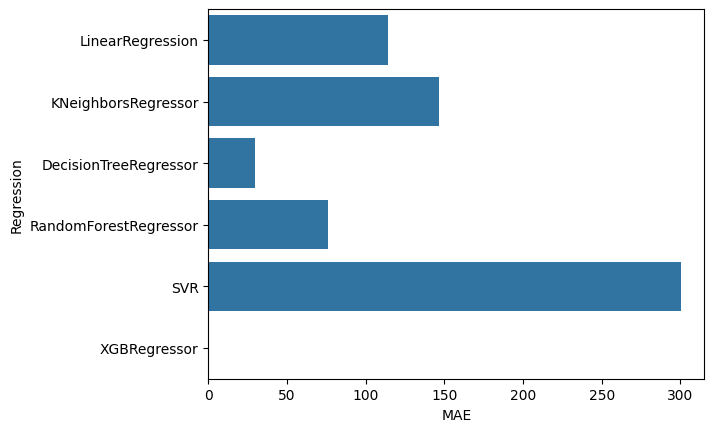

In [31]:
sns.barplot(x=result['MAE'], y=result['Regression'])

In [32]:
result

Regression  R squared         MAE
0       LinearRegression   0.973864  114.149622
1    KNeighborsRegressor   0.956541  146.811594
2  DecisionTreeRegressor   0.993668   29.602259
3  RandomForestRegressor   0.987338   75.763913
4                    SVR   0.813113  300.180890
5           XGBRegressor   1.000000    0.005761